In [2]:
!pip install CoolProp

In [3]:
from CoolProp.CoolProp import PropsSI

In [4]:
fluid = 'nitrogen'
Q1 = 0
P1 = 101325

In [19]:
# s4 = s3
Q4 = 1
P4 = P1

h4 = PropsSI('H','P',P4,'Q',Q4,fluid)
d4 = PropsSI('D','P',P4,'Q',Q4,fluid)
T4 = PropsSI('T','P',P4,'Q',Q4,fluid)
s4 = PropsSI('S','P',P4,'Q',Q4,fluid)
v4 = 1/d4

In [20]:
h1 = PropsSI('H','P',P1,'Q',Q1,fluid)
d1 = PropsSI('D','P',P1,'Q',Q1,fluid); print(d1)
s1 = PropsSI('S','P',P1,'Q',Q1,fluid)
T1 = PropsSI('T','P',P1,'Q',Q1,fluid)
v1 = 1/d1

806.0845350358799


In [21]:
P2 = 10*P1
s2 = s1

h2 = PropsSI('H','P',P2,'S',s2,fluid)
d2 = PropsSI('D','P',P2,'S',s2,fluid)
T2 = PropsSI('T','P',P2,'S',s2,fluid)
v2 = 1/d2

In [22]:
P3 = P2
# T3 = 300
s3 = s4

h3 = PropsSI('H','P',P3,'S',s3,fluid)
# s3 = PropsSI('S','P',P3,'T',T3,fluid)
d3 = PropsSI('D','P',P3,'S',s3,fluid)
T3 = PropsSI('T','P',P3,'S',s3,fluid)
v3 = 1/d3

In [13]:
import numpy as np
import matplotlib.pyplot as plt

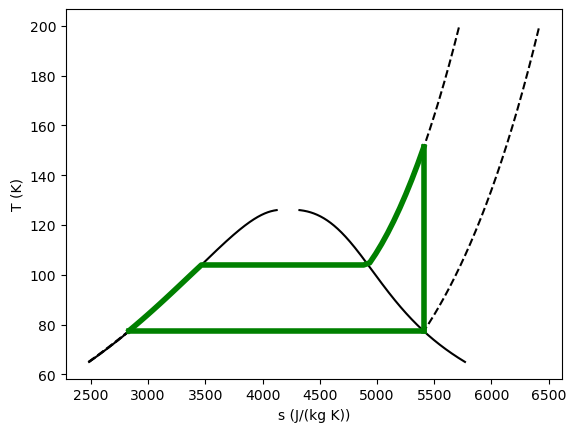

In [15]:
plt.figure()
plt.clf()

T = np.linspace(65, 200, 400) # range of temperatures
for P in [P1,P2]: #MPa
    S = [PropsSI('S','P',P,'T',t,fluid) for t in T]
    plt.plot(S, T, 'k--')
    
# saturated vapor and liquid entropy lines
Tsat = np.linspace(65, 126, 1000) # range of temperatures
svap = [PropsSI('S','T',t,'Q',1,fluid) for t in Tsat]
sliq = [PropsSI('S','T',t,'Q',0,fluid) for t in Tsat]

plt.plot(svap, Tsat, 'k-')
plt.plot(sliq, Tsat, 'k-')

# plot for the ideal cycle
plt.plot([s1, s2], [T1, T2], 'g-', lw=4) # Path 1 to 2

plt.xlabel('s (J/(kg K))')
plt.ylabel('T (K)')

S23 = np.linspace(s2, s3)
T23 = [PropsSI('T','P',P2,'S',s,fluid) for s in S23]
plt.plot(S23,T23, 'g-', lw=4)

plt.plot([s3, s4], [T3, T4], 'g-', lw=4) # path from 3 to 4 

S41 = np.linspace(s1, s4)
T41 = [PropsSI('T','P',P4,'S',s,fluid) for s in S41]
plt.plot(S41,T41, 'g-', lw=4)

plt.savefig('cryogenic-cycle-T-s.png')

#Tsat2 = np.linspace(200, 400, 1000) # range of temperatures
#plt.plot(svap, Tsat2, 'r-')
#plt.plot(sliq, Tsat2, 'r-')

In [17]:
qout = h4 - h1
qin = h3 - h2

wout = h3 - h4; print(wout)
win = h2 - h1; print(win)

71296.63645514497
1130.423736195109


In [18]:
eta = (qin - qout)/qin; print(eta)
eta_ = (wout - win)/qin; print(eta_)

0.26050947702738037
0.26050947702738025
